In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 선형회귀분석 모델
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인: qqplot, add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리: train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가 함수
from sklearn.metrics import r2_score
# 선형 모델
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import platform

# [1] 한글 폰트 설정 (운영체제별로 처리)
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'    # macOS
else:
    plt.rcParams['font.family'] = 'NanumGothic'     # Linux

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import platform

# [1] 한글 폰트 설정 (운영체제별로 처리)
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'    # macOS
else:
    plt.rcParams['font.family'] = 'NanumGothic'     # Linux

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [3]:
# [1] 한글 폰트 설정 (운영체제별로 처리)
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# elif platform.system() == 'Darwin':
#     plt.rcParams['font.family'] = 'AppleGothic'    # macOS
# else:
#     plt.rcParams['font.family'] = 'NanumGothic'     # Linux

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')


In [4]:
# 데이터 불러오기
df = pd.read_csv('/content/df_clean (2).csv', parse_dates=['OrderDT', 'DeliveryDT'])

# 확인
print("✅ 데이터 shape:", df.shape)
print("✅ 컬럼 목록:\n", df.columns)
df.head()


✅ 데이터 shape: (257161, 32)
✅ 컬럼 목록:
 Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery'],
      dtype='object')


,idUser,Gender,Age,AgeGroup,FamilyCount,MemberYN,idOrder,OrderDT,OrderMonth,OrderDay,...,DeliveryDT,Deli_Year,Deli_Month,Deli_Day,Deli_Hour,Deli_Minute,Deli_Second,Deli_Duration,Deli_Hours,IsMorningDelivery
0,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022.0,1.0,7.0,6.0,24.0,0.0,0 days 13:16:00,13.266667,1.0
1,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022.0,1.0,7.0,6.0,24.0,0.0,0 days 13:16:00,13.266667,1.0
2,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022.0,1.0,7.0,6.0,24.0,0.0,0 days 13:16:00,13.266667,1.0
3,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022.0,1.0,7.0,6.0,24.0,0.0,0 days 13:16:00,13.266667,1.0
4,U10001,여성,26,20대,2,Y,U10001-O2022-1003,2022-01-13 16:50:00,1,13,...,2022-01-14 06:28:00,2022.0,1.0,14.0,6.0,28.0,0.0,0 days 13:38:00,13.633333,1.0


<Figure size 1000x600 with 0 Axes>

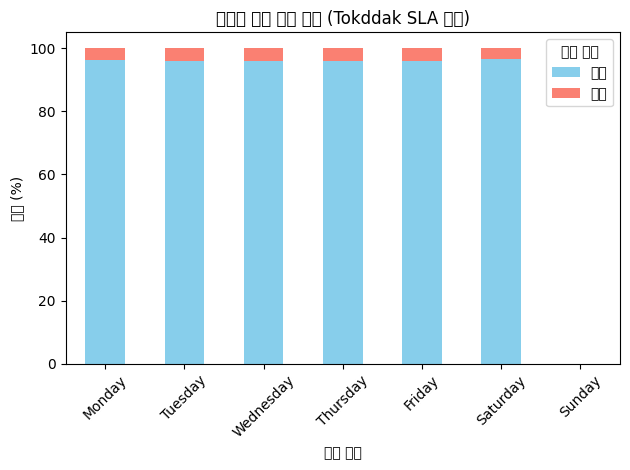

In [5]:
from datetime import timedelta
import matplotlib.pyplot as plt
import pandas as pd

# 1. 수정된 SLA 기반 배송 지연 판단 함수
from datetime import timedelta

def check_delivery(order, delivery):
    order_hour = order.hour
    order_weekday = order.weekday()  # 월=0, ..., 일=6

    # ✅ 금요일 21시 이후 주문 → 월요일 오전 9시까지 정상
    if order_weekday == 4 and order_hour >= 21:
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=3)

    # 일요일 21시 이후 주문 → 화요일 7시까지 정상
    elif order_weekday == 6 and order_hour >= 21:
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)

    # 토요일 또는 일요일 21시 이전 주문 → 월요일 7시까지 정상
    elif (order_weekday == 5) or (order_weekday == 6 and order_hour < 21):
        if order_weekday == 5:  # 토요일
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
        else:  # 일요일 21시 이전
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)

    # 평일 주문 처리
    else:
        if order_hour < 21:
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        else:
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)

    return 0 if delivery <= deadline else 1


# 2. 주문 기준 중복 제거
df_unique = df.drop_duplicates(subset="idOrder").copy()

# 3. 요일 및 배송 상태 계산
df_unique["OrderWeekday"] = df_unique["OrderDT"].dt.day_name()
df_unique["DeliveryWeekday"] = df_unique["DeliveryDT"].dt.day_name()
df_unique["OnTime"] = df_unique.apply(lambda row: check_delivery(row["OrderDT"], row["DeliveryDT"]), axis=1)
df_unique["OnTimeYN"] = df_unique["OnTime"].apply(lambda x: "정상" if x == 0 else "지연")

# 4. 요일별 배송 지연 비율 계산 (도착 기준)
delay_by_day = df_unique.groupby("DeliveryWeekday")["OnTimeYN"].value_counts(normalize=True).unstack().fillna(0) * 100
delay_by_day = delay_by_day[["정상", "지연"]]  # 순서 고정
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
delay_by_day = delay_by_day.reindex(order)

# 5. 시각화
plt.figure(figsize=(10, 6))
delay_by_day.plot(kind='bar', stacked=True, color=["skyblue", "salmon"])

plt.title("요일별 배송 지연 비율 (Tokddak SLA 기준)")
plt.xlabel("배송 요일")
plt.ylabel("비율 (%)")
plt.xticks(rotation=45)
plt.legend(title="배송 상태")
plt.tight_layout()
plt.show()


In [6]:
delay_by_day

OnTimeYN,정상,지연
DeliveryWeekday,,
Monday,96.276204,3.723796
Tuesday,95.854271,4.145729
Wednesday,96.004610,3.995390
Thursday,95.806776,4.193224
Friday,95.923261,4.076739
Saturday,96.682395,3.317605
Sunday,NaN,NaN


In [7]:
total_delay_rate = (df_unique["OnTimeYN"] == "지연").mean() * 100
print(f"전체 배송 지연율: {total_delay_rate:.2f}%")


전체 배송 지연율: 3.92%


<Figure size 1000x600 with 0 Axes>

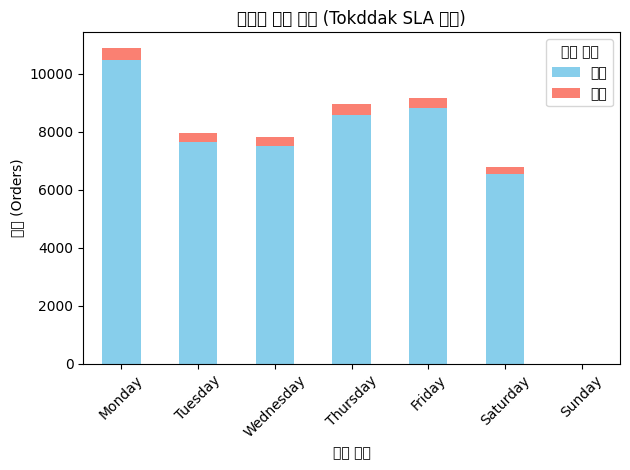

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta

# [1] SLA 함수는 그대로 사용 (이미 포함됨)

# [2] 주문 기준 중복 제거
df_unique = df.drop_duplicates(subset="idOrder").copy()

# [3] 배송 상태 계산 (OnTime, OnTimeYN)
df_unique["OrderWeekday"] = df_unique["OrderDT"].dt.day_name()
df_unique["DeliveryWeekday"] = df_unique["DeliveryDT"].dt.day_name()
df_unique["OnTime"] = df_unique.apply(lambda row: check_delivery(row["OrderDT"], row["DeliveryDT"]), axis=1)
df_unique["OnTimeYN"] = df_unique["OnTime"].apply(lambda x: "정상" if x == 0 else "지연")

# [4] 요일별 배송 상태 "건수" 집계
delay_by_day_count = df_unique.groupby("DeliveryWeekday")["OnTimeYN"].value_counts().unstack().fillna(0).astype(int)
delay_by_day_count = delay_by_day_count[["정상", "지연"]]  # 순서 고정
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
delay_by_day_count = delay_by_day_count.reindex(order)

# [5] 시각화 (건수 기준)
plt.figure(figsize=(10, 6))
delay_by_day_count.plot(kind='bar', stacked=True, color=["skyblue", "salmon"])

plt.title("요일별 배송 건수 (Tokddak SLA 기준)")
plt.xlabel("배송 요일")
plt.ylabel("건수 (Orders)")
plt.xticks(rotation=45)
plt.legend(title="배송 상태")
plt.tight_layout()
plt.show()


In [9]:
delay_by_day_count

OnTimeYN,정상,지연
DeliveryWeekday,,
Monday,10471.0,405.0
Tuesday,7630.0,330.0
Wednesday,7497.0,312.0
Thursday,8568.0,375.0
Friday,8800.0,374.0
Saturday,6557.0,225.0
Sunday,NaN,NaN


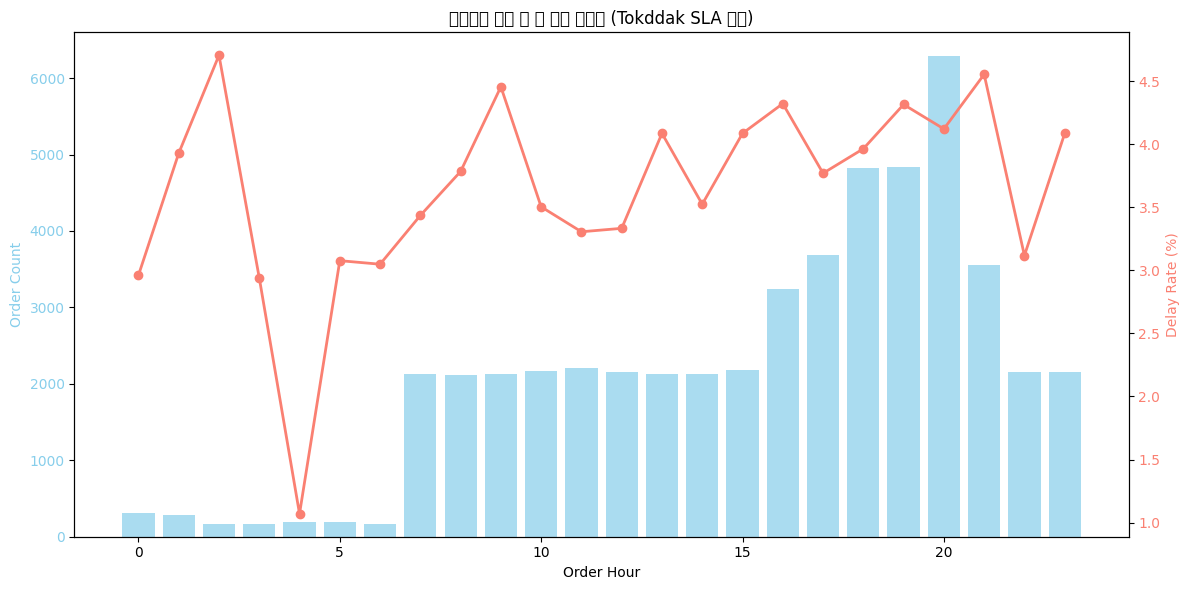

In [10]:
import matplotlib.pyplot as plt

# 주문 시간 추출 (이미 존재하면 생략 가능)
df_unique['OrderHour'] = df_unique['OrderDT'].dt.hour

# 시간대별 주문 수
hourly_orders = df_unique.groupby('OrderHour')['idOrder'].count().reset_index()
hourly_orders.columns = ['OrderHour', 'OrderCount']

# 시간대별 배송 지연율
hourly_delay = df_unique.groupby('OrderHour')['OnTime'].mean().reset_index()
hourly_delay.columns = ['OrderHour', 'DelayRate']
hourly_delay['DelayRate'] *= 100  # 비율 변환

# 병합
hourly_stats = pd.merge(hourly_orders, hourly_delay, on='OrderHour')

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 주문 수 - 막대그래프
ax1.bar(hourly_stats['OrderHour'], hourly_stats['OrderCount'], color='skyblue', alpha=0.7, label='Order Count')
ax1.set_ylabel('Order Count', color='skyblue')
ax1.set_xlabel('Order Hour')
ax1.tick_params(axis='y', labelcolor='skyblue')

# 지연율 - 선그래프
ax2 = ax1.twinx()
ax2.plot(hourly_stats['OrderHour'], hourly_stats['DelayRate'], color='salmon', marker='o', linewidth=2, label='Delay Rate')
ax2.set_ylabel('Delay Rate (%)', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

plt.title("시간대별 주문 수 및 배송 지연율 (Tokddak SLA 기준)")
fig.tight_layout()
plt.show()


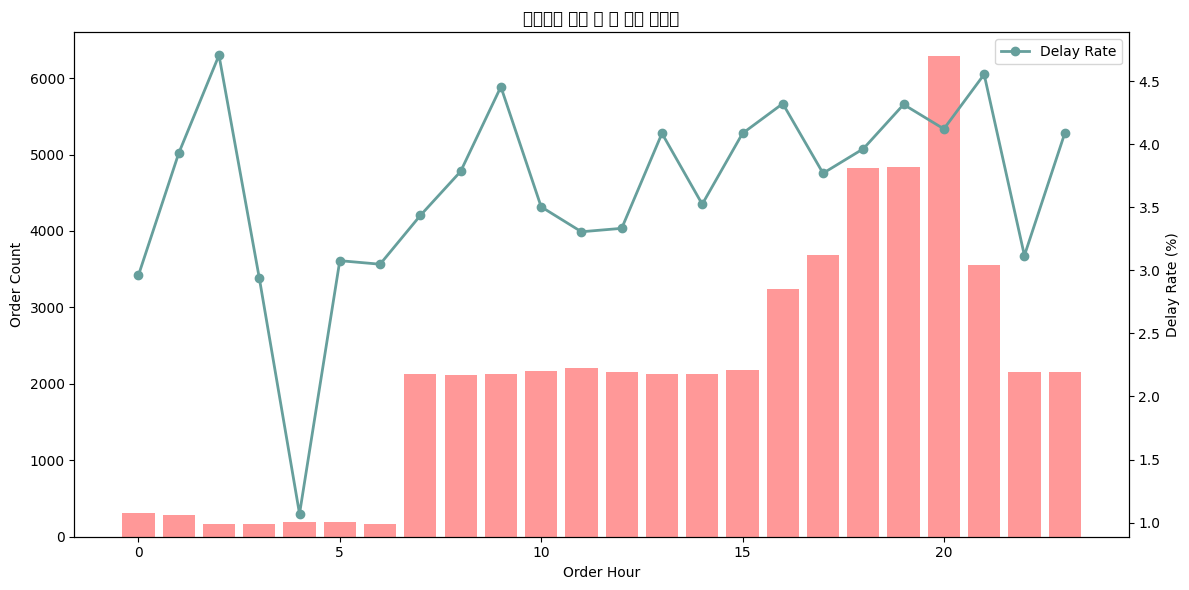

In [11]:
import matplotlib.pyplot as plt

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 주문 수 - 코랄레드 계열 막대그래프
ax1.bar(hourly_stats['OrderHour'], hourly_stats['OrderCount'],
        color='#ff7f7f', alpha=0.8, label='Order Count')
ax1.set_ylabel('Order Count') #, color='#ff7f7f'
ax1.set_xlabel('Order Hour')
ax1.tick_params(axis='y') #, labelcolor='#ff7f7f'

# 배송 지연율 - 진한 코랄 선그래프
ax2 = ax1.twinx()
ax2.plot(hourly_stats['OrderHour'], hourly_stats['DelayRate'],
         color='#669f9c', marker='o', linewidth=2, label='Delay Rate')
ax2.set_ylabel('Delay Rate (%)') #, color=
ax2.tick_params(axis='y') #, labelcolor='#ff5757'

plt.title("시간대별 주문 수 및 배송 지연율")
plt.legend() #title='뭐넣을게 없네'
fig.tight_layout()
plt.show()


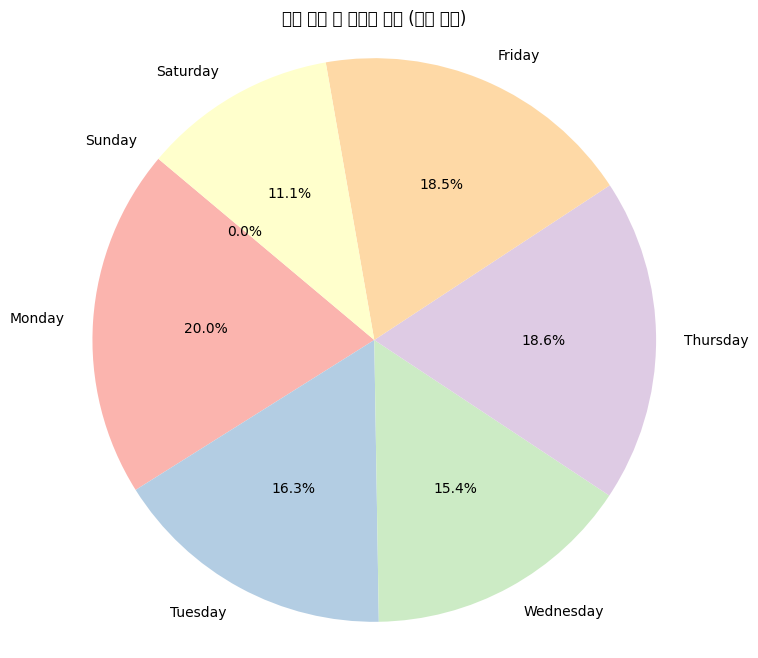

In [12]:
# 전체 지연 중 요일별 비중 (배송 요일 기준)
delay_share_by_day = df_unique[df_unique["OnTimeYN"] == "지연"]["DeliveryWeekday"].value_counts(normalize=True).reindex(order, fill_value=0) * 100

# 파이 차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(
    delay_share_by_day,
    labels=delay_share_by_day.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title("전체 지연 중 요일별 비중 (파이 차트)")
plt.axis("equal")  # 원형 유지
plt.show()


In [13]:
import pandas as pd

# 1. 연도 추출 (OrderDT에서)
df_unique['OrderYear'] = df_unique['OrderDT'].dt.year

# 2. 연도별 배송 지연률 계산
yearly_delay = df_unique.groupby('OrderYear')['OnTime'].mean().reset_index()
yearly_delay.columns = ['Year', 'DelayRate']
yearly_delay['DelayRate'] = (yearly_delay['DelayRate'] * 100).round(2)  # 퍼센트 변환

# 3. 출력
print("📊 연도별 배송 지연률 (%)")
print(yearly_delay)


📊 연도별 배송 지연률 (%)
   Year  DelayRate
0  2022       3.98
1  2023       3.93
2  2024       3.86


Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery', 'OrderWeekday', 'DeliveryWeekday',
       'OnTime', 'OnTimeYN', 'OrderYear', 'Year'],
      dtype='object')
연도별 배송 횟수 합산:
Year
2022    15736
2023    17188
2024    18620
Name: count, dtype: int64


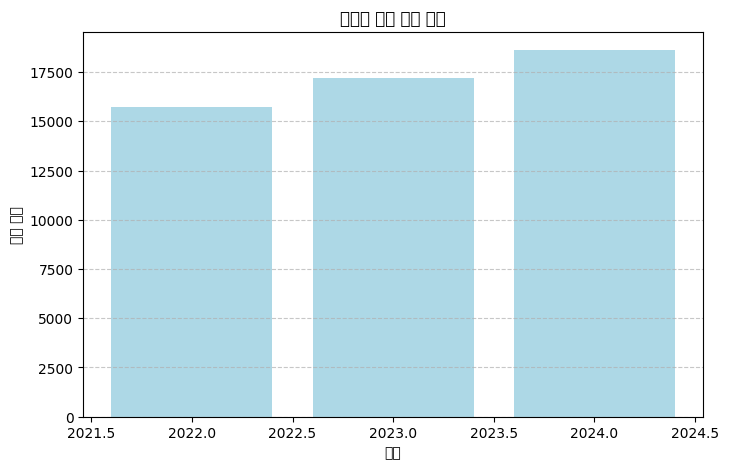

연도별 배송 횟수 합산:
Year
2022    15743
2023    17208
2024    18593
Name: count, dtype: int64


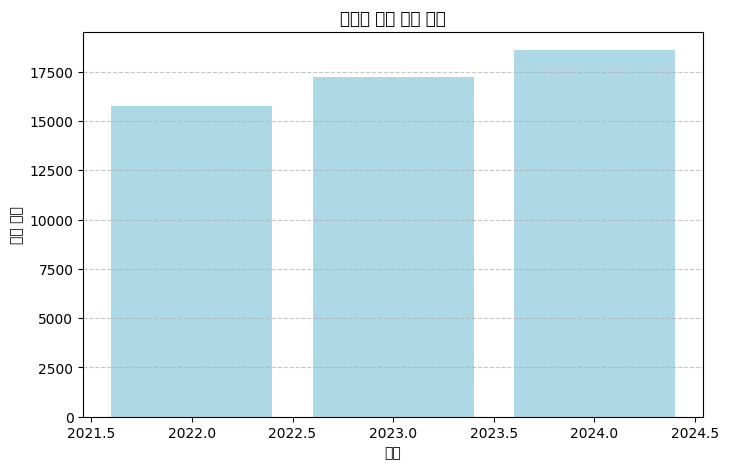

In [17]:
print(df_unique.columns)

df_unique['Year'] = df_unique['DeliveryDT'].dt.year
yearly_counts = df_unique['Year'].value_counts().sort_index()

print("연도별 배송 횟수 합산:")
print(yearly_counts)

plt.figure(figsize=(8, 5))
plt.bar(yearly_counts.index, yearly_counts.values, color='lightblue')
plt.title("연도별 배송 횟수 합산")
plt.xlabel("연도")
plt.ylabel("배송 횟수")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



연도별 배송 횟수 합산:
Year
2022    15743
2023    17208
2024    18593
Name: count, dtype: int64


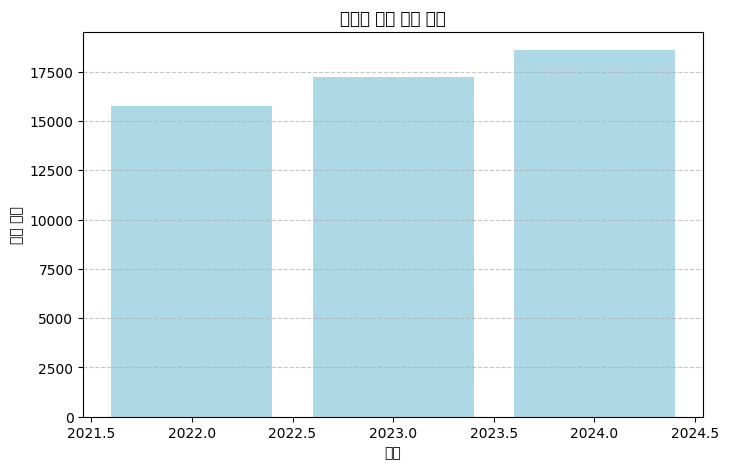

In [18]:

df_unique['Year'] = df_unique['OrderDT'].dt.year
yearly_counts = df_unique['Year'].value_counts().sort_index()

print("연도별 배송 횟수 합산:")
print(yearly_counts)

plt.figure(figsize=(8, 5))
plt.bar(yearly_counts.index, yearly_counts.values, color='lightblue')
plt.title("연도별 배송 횟수 합산")
plt.xlabel("연도")
plt.ylabel("배송 횟수")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

연도별 배송 지연 횟수 합산:
Year
2022    627
2023    676
2024    718
Name: count, dtype: int64


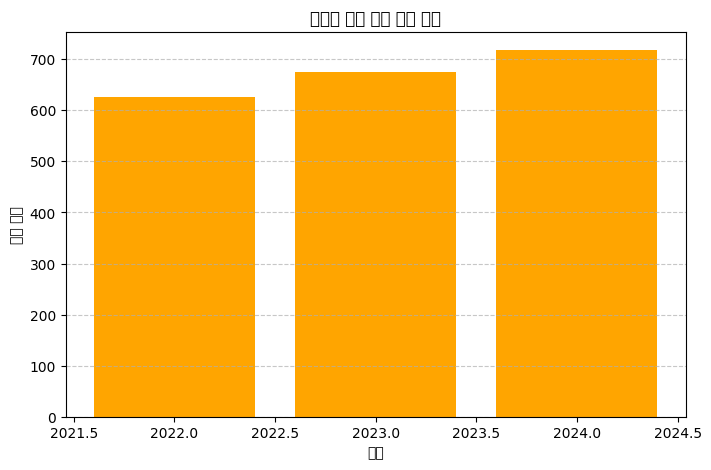

In [20]:
df_unique['Year'] = df_unique['OrderDT'].dt.year
yearly_delay_counts = df_unique[df_unique['OnTime'] == 1]['Year'].value_counts().sort_index()

print("연도별 배송 지연 횟수 합산:")
print(yearly_delay_counts)

# 그래프 시각화
plt.figure(figsize=(8, 5))
plt.bar(yearly_delay_counts.index, yearly_delay_counts.values, color='orange')
plt.title("연도별 배송 지연 횟수 합산")
plt.xlabel("연도")
plt.ylabel("지연 횟수")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()